# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# install citipy first from command prompt <pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
Cities = 500
Lat = []
Lng = []
Citys = []
Countries = []

In [8]:
for i in range(Cities):
    Lat_Coordinate = random.uniform(-90,90)
    Lng_Coordinate = random.uniform(-180,180)
    Lat.append(Lat_Coordinate)
    Lng.append(Lng_Coordinate)
    city = citipy.nearest_city(Lat_Coordinate,Lng_Coordinate)
    city_name = city.city_name
    Citys.append(city_name)
    country_name = city.country_code
    Countries.append(country_name)

In [9]:
len(Countries)

500

In [10]:
city_df=pd.DataFrame({
    "Lattitude":Lat,
    "Longitude":Lng,
    "City":Citys,
    "Country":Countries
})
city_df.head()

,Lattitude,Longitude,City,Country
0,-62.736510,80.699706,busselton,au
1,-65.464520,-20.132931,chuy,uy
2,-22.459359,-172.420119,vaini,to
3,7.122098,-163.953626,makakilo city,us
4,61.191414,44.960557,kizema,ru


In [11]:
# Output File (CSV)
#output_data_file = "output_data/cities.csv"

## Generate Cities List

In [12]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

In [9]:
city_df.shape

(500, 4)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#Config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Partial Query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=253255195ad8c3756e62074699a2a842&units=imperial&q=


In [14]:
city_list = list(city_df['City'])
city_list[0]

'busselton'

In [15]:
response = requests.get(query_url + city_list[0]).json()
response

{'coord': {'lon': 115.35, 'lat': -33.64},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 65.01,
  'pressure': 1004,
  'humidity': 36,
  'temp_min': 60.01,
  'temp_max': 69.01},
 'wind': {'speed': 7.74, 'deg': 18.502},
 'clouds': {'all': 88},
 'dt': 1554058552,
 'sys': {'type': 3,
  'id': 2011706,
  'message': 0.0034,
  'country': 'AU',
  'sunrise': 1554071401,
  'sunset': 1554113702},
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [16]:
bot = 0
for x in range(len(city_list)):
    bot = bot + 1
    response = requests.get(query_url + city_list[x]).json()
    print(f"Processing Record {bot} of 500| {city_list[x]}")

Processing Record 1 of 500| busselton
Processing Record 2 of 500| chuy
Processing Record 3 of 500| vaini
Processing Record 4 of 500| makakilo city
Processing Record 5 of 500| kizema
Processing Record 6 of 500| hermanus
Processing Record 7 of 500| awjilah
Processing Record 8 of 500| qasigiannguit
Processing Record 9 of 500| lensk
Processing Record 10 of 500| bluff
Processing Record 11 of 500| punta arenas
Processing Record 12 of 500| harnosand
Processing Record 13 of 500| coahuayana
Processing Record 14 of 500| rungata
Processing Record 15 of 500| ushuaia
Processing Record 16 of 500| pochutla
Processing Record 17 of 500| tiksi
Processing Record 18 of 500| arraial do cabo
Processing Record 19 of 500| yomitan
Processing Record 20 of 500| nizhneyansk
Processing Record 21 of 500| lata
Processing Record 22 of 500| avarua
Processing Record 23 of 500| kyzyl-suu
Processing Record 24 of 500| pevek
Processing Record 25 of 500| vaitupu
Processing Record 26 of 500| upernavik
Processing Record 27 of

Processing Record 210 of 500| vaitupu
Processing Record 211 of 500| puquio
Processing Record 212 of 500| along
Processing Record 213 of 500| charters towers
Processing Record 214 of 500| puerto ayora
Processing Record 215 of 500| punta arenas
Processing Record 216 of 500| saleaula
Processing Record 217 of 500| half moon bay
Processing Record 218 of 500| rikitea
Processing Record 219 of 500| ancud
Processing Record 220 of 500| grand river south east
Processing Record 221 of 500| srednekolymsk
Processing Record 222 of 500| nome
Processing Record 223 of 500| ayan
Processing Record 224 of 500| tuktoyaktuk
Processing Record 225 of 500| georgiyevka
Processing Record 226 of 500| mataura
Processing Record 227 of 500| klaksvik
Processing Record 228 of 500| paamiut
Processing Record 229 of 500| darnah
Processing Record 230 of 500| taolanaro
Processing Record 231 of 500| khatanga
Processing Record 232 of 500| jamestown
Processing Record 233 of 500| tsihombe
Processing Record 234 of 500| fort nels

Processing Record 417 of 500| port hardy
Processing Record 418 of 500| urumqi
Processing Record 419 of 500| bulgan
Processing Record 420 of 500| rikitea
Processing Record 421 of 500| puerto ayora
Processing Record 422 of 500| leningradskiy
Processing Record 423 of 500| nikolskoye
Processing Record 424 of 500| lompoc
Processing Record 425 of 500| ushuaia
Processing Record 426 of 500| sangar
Processing Record 427 of 500| chokurdakh
Processing Record 428 of 500| presidencia roque saenz pena
Processing Record 429 of 500| jamestown
Processing Record 430 of 500| rikitea
Processing Record 431 of 500| rikitea
Processing Record 432 of 500| thompson
Processing Record 433 of 500| takoradi
Processing Record 434 of 500| faanui
Processing Record 435 of 500| geraldton
Processing Record 436 of 500| port-cartier
Processing Record 437 of 500| busselton
Processing Record 438 of 500| ushuaia
Processing Record 439 of 500| puerto ayora
Processing Record 440 of 500| sarkand
Processing Record 441 of 500| hilo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [18]:
response['name'],response['clouds']['all'],response['sys']['country'],response['dt'],response['main']['humidity'],response['coord']['lat'],response['coord']['lon'],response['main']['temp_max'],response['wind']['speed']

('Rikitea', 56, 'PF', 1554058629, 100, -23.12, -134.97, 76.66, 19.48)

In [19]:
city1 = []
cloudiness1 = []
country1 = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for x in range(500):
    try:
        response = requests.get(query_url + city_list[x]).json()
        tname = response['name']
        tcloudiness = response['clouds']['all']
        tcountry = response['sys']['country']
        tdate = response['dt']
        thumidity = response['main']['humidity']
        tlat = response['coord']['lat']
        tlng = response['coord']['lon']
        tmaxtemp = response['main']['temp_max']
        twindspeed = response['wind']['speed']
        city1.append(tname)
        cloudiness1.append(tcloudiness)
        country1.append(tcountry)
        date.append(tdate)
        humidity.append(thumidity)
        lat.append(tlat)
        lng.append(tlng)
        max_temp.append(tmaxtemp)
        wind_speed.append(twindspeed)
    except KeyError:
        response = ""
        tname = city_list[x]
        tcloudiness = 0
        tcountry = "N/A"
        tdate = ""
        thumidity = 0
        tlat = 0
        tlng = 0
        tmaxtemp = 0
        twindspeed = 0
        city1.append(tname)
        cloudiness1.append(tcloudiness)
        country1.append(tcountry)
        date.append(tdate)
        humidity.append(thumidity)
        lat.append(tlat)
        lng.append(tlng)
        max_temp.append(tmaxtemp)
        wind_speed.append(twindspeed)
print("Done")

Done


In [20]:
print(len(city1))

500


In [21]:
df = pd.DataFrame({
    "City": city1,
    "Cloudiness": cloudiness1,
    "Country" : country1,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})

df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,88,AU,1554058552,36,-33.64,115.35,69.01,7.74
1,Chuy,0,UY,1554058607,93,-33.69,-53.46,77.20,8.19
2,Vaini,0,IN,1554058574,83,15.34,74.49,72.70,3.38
3,Makakilo City,1,US,1554058532,73,21.35,-158.09,75.00,3.36
4,Kizema,92,RU,1554058608,92,61.11,44.83,29.95,7.85
5,Hermanus,12,ZA,1554057954,96,-34.42,19.24,60.01,1.99
6,Awjilah,0,LY,1554058609,37,29.14,21.30,63.07,10.42
7,Qasigiannguit,75,GL,1554054600,61,68.82,-51.19,17.60,13.87
8,Lensk,0,RU,1554058609,67,60.71,114.91,13.66,3.71
9,Bluff,0,AU,1554058610,62,-23.58,149.07,54.61,9.42


In [22]:
df.to_csv("Weather Data Frame - Tim")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

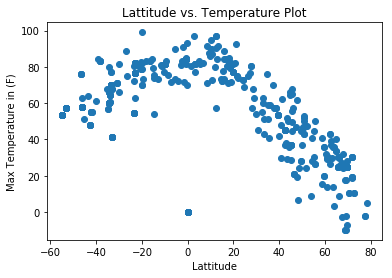

In [23]:
x = df['Lat']
y = df['Max Temp']
LatTemp = plt.scatter(x, y)
plt.title("Lattitude vs. Temperature Plot")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature in (F)")
plt.show()

In [24]:
plt.savefig('lat and temp.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Observation 1 - Temperatures are higher in cities closer to the equator.

#### Latitude vs. Humidity Plot

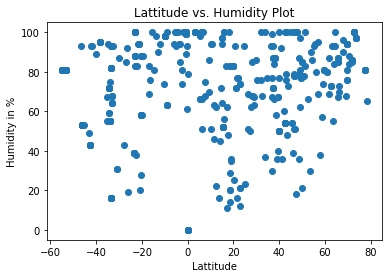

In [22]:
x = df['Lat']
y = df['Humidity']
LatTemp = plt.scatter(x, y)
plt.title("Lattitude vs. Humidity Plot")
plt.xlabel("Lattitude")
plt.ylabel("Humidity in %")
plt.show()

In [25]:
plt.savefig('lat and humidity.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

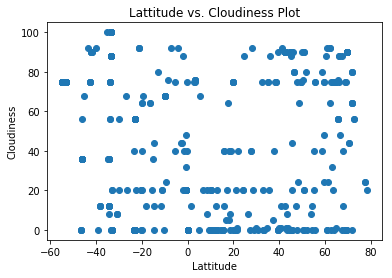

In [26]:
x = df['Lat']
y = df['Cloudiness']
LatTemp = plt.scatter(x, y)
plt.title("Lattitude vs. Cloudiness Plot")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.show()

In [27]:
plt.savefig('lat and cloud.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Observation 3 - It is generally less cloudy overall. 

#### Latitude vs. Wind Speed Plot

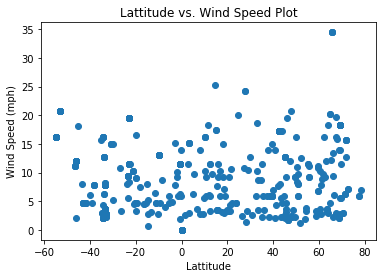

In [28]:
x = df['Lat']
y = df['Wind Speed']
LatTemp = plt.scatter(x, y)
plt.title("Lattitude vs. Wind Speed Plot")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [29]:
plt.savefig('lat and wind.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Observation 2 - Wind speed is generally between 3 and 10 miles per hour.